# ASTR 211 - HW04 - Sadie Seddon-Stettler

In [23]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

## Task 1a

In [5]:
irand10 = np.random.random_integers(low=0, high=9, size=10)
irand20 = np.random.random_integers(low=0, high=19, size=20)
irand30 = np.random.random_integers(low=0, high=29, size=30)

print(irand10)
print(irand20)
print(irand30)

[8 2 5 0 5 5 7 7 4 3]
[14 15  6 12 13 11  3  0  7  9  2 19  5  4  4 16  3  5  9 15]
[26 24 27 17 20 27 16 25 20 25  9 15  2  9 16 18 20  4  3 14 29  1 23 13
 22  8 24 13  1 22]


C:\Users\sadie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  """Entry point for launching an IPython kernel.
C:\Users\sadie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 19 + 1) instead
  
C:\Users\sadie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


The numbers do appear to be random, but they do repeat - for instance, irand10 contains multiple instances of 5 and 7. This is fine for general purposes - true randomness, after all, does cluster. However, this means that the function should not be used to generate ir1, ir2, and ir3, as since the numbers do repeat the indices would not be guaranteed to be unique.

## Task 1b

In [10]:
ordered_ints = np.linspace(0, 9, num=10)

perm = np.random.permutation(ordered_ints)
print(perm)

perm = np.random.permutation(ordered_ints)
print(perm)

perm = np.random.permutation(ordered_ints)
print(perm)

[0. 4. 6. 2. 3. 8. 7. 5. 1. 9.]
[1. 2. 9. 4. 0. 8. 3. 6. 7. 5.]
[6. 8. 9. 0. 1. 5. 3. 4. 7. 2.]


Running the function repeatedly on the same vector does, in fact, randomly shuffle the order of the vector elements. My algorithm for producing ir1, ir2, ir3 indices is:

def produce_indices(n, i) #where n is the desired vector size and i is as used in the DE algorithm

    ordered_ints = np.linspace(0, n, num=n)
    perm = np.random.permutation(ordered_ints)
    i_s = []
    
    for x in range(0, 3):
        if perm[x] != i:
            i_s.append(perm[x])
            
    ir1 = i_s[0]
    ir2 = i_s[1]
    ir3 = i_s[2]
    
    return ir1, ir2, ir3

The significant advantage of this method over 1a is that numbers do not repeat, so you are never worried about having ir1 = ir2 = ir3.

## Task 1c

I have chosen the Scott binning method, since that binning method assumes a gaussian distribution, and I have chosen a size of 10,000 simply by repeatedly plotting for various sizes and discovering that 10,000 is the lowest number that looks good.

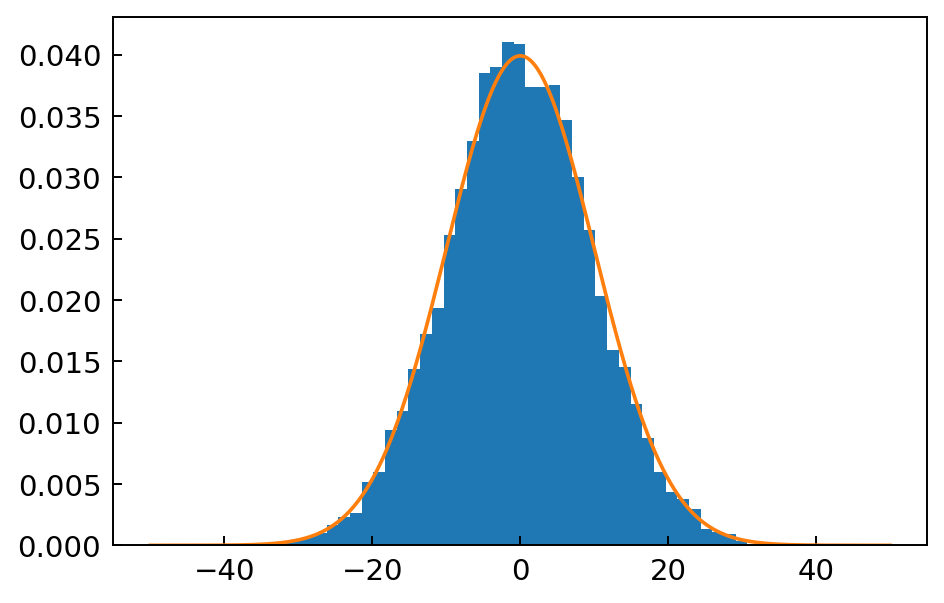

In [44]:
xgauss = np.random.normal(loc=0, scale=10, size=10000)
xhist = plt.hist(xgauss, bins='scott', density=True)
def xfunc(x):
    ex = -(x ** 2) / (2 * (10 ** 2))
    frac = 1 / (np.sqrt(2 * np.pi) * 10)
    return frac * np.exp(ex)

x = np.linspace(-50,50,10000)
plot = plt.plot(x, xfunc(x))

plt.show()

## Task 2a

In [ ]:
def gdist(nrnd = 1, a = 2.0):
    """
    function to sample distribution g(x) = 1/sqrt(x) for x in [1/a,a] and g(x)=0 otherwise.
    
    Parameters:
    -----------
    nrnd: integer (default is 1)
        number of pseudo-random draws of g(x) to generate
    a: real 
       parameter defining the range of the distribution (see above)
       
    Returns: 
    --------
    a numpy real 1d vector of size nrnd
    (pseudo-random numbers distributed with g(x), as defined above 
    """
    c = 1 / ((1/a)**a)